## **Data Analysis for Memorable / Tekal-AI**

#### Second Section for Recruitment Challenge: *Deep Analysis*

In [ ]:
%pip install -r requirements.txt

#### Context: 

Memorable / Tekal-AI is currently developing tools based on AI models to assess the cognitive impact of videos and images. Client's assets data is analyzed in order understand the memorability and saliency metrics.

#### Analytical Context:
The case is structured as:
- Analyze the input database and identify potential problems.
- Conduct exploratory data analysis to determine which features seem to account for most of the Score Metrics.
- Develop Models to predict and explain the behaivor of Score Metrics.

**Import Libraries**

In [ ]:
# IMPORT CLASICAL DATA ANALYSIS / DATA SCIENCE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# Augmented Dickey-Fuller test to determine how strongly a time series is defined by a trend
from statsmodels.tsa.stattools import adfuller
# regression library
import statsmodels.formula.api as sm
import statsmodels.api as sm_
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm



# IMPORT SQL LIBRARIES
import sqlalchemy
import sqlite3 as db

from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph

**Create connection to SQLite Database**

In [7]:
#Let's try using sqlite3 as suggested
conn = db.connect("data/mock_db_v2.db")

In order to Analyse the impact of each feature to the Score Metrics It is necessary to build a single table of Observations

Score Metrics are:
- oohScore (After a short google search I found out this is an Acronym for *Out of Home* or Traditional Media Advertisement Like Billboards https://en.wikipedia.org/wiki/Out-of-home_advertising)
- smScore
- tvScore

These metrics are on the "Asset" table, which contains 800 observations/rows

According the relationship of Keys on each table from the database, the next query delivers a single dataframe with the most amount of observations for Score Metrics and Features:

In [4]:
Query= """SELECT *
FROM
  (SELECT Q1.ASSETID,Q1.ASSETID,
             Q1.ASSETTYPEID,
             Q1.NAME,
             Q1.ID,AC.ID,AC.CREATEDAT,AC.UPDATEDAT,AC.ASSETID,AC.COLOR,AC.COVERAGE
   FROM
     (SELECT AAT.ASSETID,
             AAT.ASSETTYPEID,
             AT.NAME,
             AT.ID
      FROM ASSET_ASSET_TYPES AAT
      INNER JOIN ASSET_TYPE AT ON AT.ID=AAT.ASSETTYPEID) Q1
   INNER JOIN ASSET_COLOR AC ON AC.ASSETID = Q1.ASSETID) Q2
INNER JOIN ASSET A ON A.ID = Q2.ASSETID"""

df=pd.read_sql(Query,con=conn)
df

,ASSETID,ASSETID:1,ASSETTYPEID,NAME,ID,ID:1,CREATEDAT,UPDATEDAT,ASSETID:2,COLOR,...,smScore,tvcScore,widthPx,heightPx,userId,deletedAt,status,parentAssetTypeId,publishedAt,scraped
0,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RR17QS3824HQXJE6V4,2022-05-13 12:47:22.159531,2022-05-13 12:47:22.159531,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Light Gray,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
1,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RR48751M0R9PACK1V5,2022-05-13 12:47:22.158055,2022-05-13 12:47:22.158055,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,White,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
2,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RRQC3C3024HE3V28JK,2022-05-13 12:47:22.16095,2022-05-13 12:47:22.16095,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Khaki,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
3,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RRWG8V1B4JSFHXF4HA,2022-05-13 12:47:22.156237,2022-05-13 12:47:22.156237,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Beige,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
4,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB63KFF29W4Y36MZ1NFHG,2022-05-13 12:47:22.40179,2022-05-13 12:47:22.40179,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,Gray,...,71.9500,76.9291,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:37.095722,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N0AE2YHQ87YB2ZXNS,2022-05-13 12:47:35.886489,2022-05-13 12:47:35.886489,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Steel Blue,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
872,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N33NGDRDV0S996AQ0,2022-05-13 12:47:35.884683,2022-05-13 12:47:35.884683,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Light Blue,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
873,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N6XWJTSSS92JC4AGB,2022-05-13 12:47:35.890981,2022-05-13 12:47:35.890981,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Green,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
874,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7NB3NC6JKDQ7APFP08,2022-05-13 12:47:35.88791,2022-05-13 12:47:35.88791,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Light Gray,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0


## Exploratory Data Analysis

Now lets delete duplicated Columns:

In [5]:
df=df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()].copy()

Let's check null records of each columns

In [6]:
df.isnull().sum().sort_values(ascending=False)

deletedAt            874
duration             865
frameCount           865
framesPerSecond      865
campaignId           555
publishedAt            0
parentAssetTypeId      0
status                 0
userId                 0
heightPx               0
widthPx                0
tvcScore               0
smScore                0
oohScore               0
brandId                0
ASSETID                0
ASSETTYPEID            0
mimeType               0
fileType               0
sectorId               0
updatedAt              0
createdAt              0
name                   0
COVERAGE               0
COLOR                  0
CREATEDAT              0
ID:1                   0
NAME                   0
scraped                0
dtype: int64

As the distribution of null records is likely the same (867.25 on average) for deletedAt, duration, frameCount, framesPerSecond, I decide to drop those columns.

In [7]:
df=df.drop(['deletedAt', 'duration', 'frameCount', 'framesPerSecond'],axis=1)
df

,ASSETID,ASSETTYPEID,NAME,ID:1,CREATEDAT,COLOR,COVERAGE,name,createdAt,updatedAt,...,oohScore,smScore,tvcScore,widthPx,heightPx,userId,status,parentAssetTypeId,publishedAt,scraped
0,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB5RR17QS3824HQXJE6V4,2022-05-13 12:47:22.159531,Light Gray,0.168125,Duke's Mayonnaise_10160460751008291_1649898692...,2022-04-17 01:04:36.976424,2022-04-17 01:05:25.961848,...,83.7600,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
1,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB5RR48751M0R9PACK1V5,2022-05-13 12:47:22.158055,White,0.319219,Duke's Mayonnaise_10160460751008291_1649898692...,2022-04-17 01:04:36.976424,2022-04-17 01:05:25.961848,...,83.7600,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
2,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB5RRQC3C3024HE3V28JK,2022-05-13 12:47:22.16095,Khaki,0.103906,Duke's Mayonnaise_10160460751008291_1649898692...,2022-04-17 01:04:36.976424,2022-04-17 01:05:25.961848,...,83.7600,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
3,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB5RRWG8V1B4JSFHXF4HA,2022-05-13 12:47:22.156237,Beige,0.125469,Duke's Mayonnaise_10160460751008291_1649898692...,2022-04-17 01:04:36.976424,2022-04-17 01:05:25.961848,...,83.7600,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
4,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB63KFF29W4Y36MZ1NFHG,2022-05-13 12:47:22.40179,Gray,0.130156,Duke's Mayonnaise_10160451735808291_1649597820...,2022-04-17 01:04:37.095722,2022-04-17 01:05:26.249992,...,82.2400,71.9500,76.9291,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:37.095722,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N0AE2YHQ87YB2ZXNS,2022-05-13 12:47:35.886489,Steel Blue,0.172460,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
872,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N33NGDRDV0S996AQ0,2022-05-13 12:47:35.884683,Light Blue,0.328493,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
873,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N6XWJTSSS92JC4AGB,2022-05-13 12:47:35.890981,Green,0.109567,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
874,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7NB3NC6JKDQ7APFP08,2022-05-13 12:47:35.88791,Light Gray,0.166351,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0


To improve the readability of the columns-names let's change the repeated or confusable 

In [8]:
df.rename(columns={'NAME':'Asset_Type_Name','ID:1':'ID','name':'Filename','CREATEDAT':'CREATEDAT_COLOR'},inplace=True)

Let's take a look about the null values from campaignId Column

In [9]:
df.loc[df.campaignId.isnull()]

,ASSETID,ASSETTYPEID,Asset_Type_Name,ID,CREATEDAT_COLOR,COLOR,COVERAGE,Filename,createdAt,updatedAt,...,oohScore,smScore,tvcScore,widthPx,heightPx,userId,status,parentAssetTypeId,publishedAt,scraped
46,AR201G1189TKGYK4RPC2NFYPE0D7FNPÑ,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95BQE6Q1E58BNW8FH13A,2022-05-13 12:46:16.190948,Sienna,0.110156,dukes_mayonnaise_2654928180444767140_163071212...,2022-04-19 15:50:49.662511,2022-04-19 17:24:13.644575,...,69.3200,54.1500,50.8055,1080,810,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-03 20:35:23,0
47,AR201G1189TKGYK4RPC2NFYPE0D7FNPÑ,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95BQGS36G69VF8B4P8RY,2022-05-13 12:46:16.192659,Black,0.221406,dukes_mayonnaise_2654928180444767140_163071212...,2022-04-19 15:50:49.662511,2022-04-19 17:24:13.644575,...,69.3200,54.1500,50.8055,1080,810,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-03 20:35:23,0
48,AR201G1189TKGYK4RPC2NFYPE0D7FNPÑ,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95BQN0ZKAGV8KBWFD3AJ,2022-05-13 12:46:16.189208,Green,0.126406,dukes_mayonnaise_2654928180444767140_163071212...,2022-04-19 15:50:49.662511,2022-04-19 17:24:13.644575,...,69.3200,54.1500,50.8055,1080,810,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-03 20:35:23,0
49,AR201G1189TKGYK4RPC2NFYPE0D7FNPÑ,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95BQPYZ6Q51AA2209CQM,2022-05-13 12:46:16.187548,White,0.126719,dukes_mayonnaise_2654928180444767140_163071212...,2022-04-19 15:50:49.662511,2022-04-19 17:24:13.644575,...,69.3200,54.1500,50.8055,1080,810,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-03 20:35:23,0
50,ÑFN01G1189TKJ7WS7T97SXY0RFM15I9P,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95MA10FZBE17ZE1HTTRN,2022-05-13 12:46:16.443003,Light Blue,0.370625,dukes_mayonnaise_2655346415092184951_163076198...,2022-04-19 15:50:49.674895,2022-04-19 17:24:13.639451,...,69.4900,53.1000,56.6236,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-04 10:26:21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N0AE2YHQ87YB2ZXNS,2022-05-13 12:47:35.886489,Steel Blue,0.172460,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
872,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N33NGDRDV0S996AQ0,2022-05-13 12:47:35.884683,Light Blue,0.328493,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
873,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N6XWJTSSS92JC4AGB,2022-05-13 12:47:35.890981,Green,0.109567,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
874,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7NB3NC6JKDQ7APFP08,2022-05-13 12:47:35.88791,Light Gray,0.166351,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0


In [10]:
df.campaignId.value_counts()

FDQ01G118Q6Q21TMRRCSVJZ49YFJ8QÑF    275
5OR01G0TFMBECF7VV2K82BP52YB3BQ0D     46
Name: campaignId, dtype: int64

As the proportion of Null values from CampaignId is high (63%) and the data from the other columns on those records are valuable, I am not going to drop them. Therefore, let's find a strategy to replace those Null values

In [11]:

df.fillna(value=np.nan, inplace=True)
print (df.duplicated().any())
#there are no duplicated rows


False


First lets separate the continous variables and categorical features.

pandas correlation matrix 

Since correlations are best suited for analyzing linear relationships, let's create a matrix of 2D scatterplots for each pair of variables also, so that we can visually pick up on any potential non-linear relationships

In [12]:
df.corr()

,COVERAGE,oohScore,smScore,tvcScore,widthPx,heightPx,scraped
COVERAGE,1.000000,0.096703,0.065822,0.134008,0.007918,0.038982,NaN
oohScore,0.096703,1.000000,0.921892,0.882717,0.017718,0.049575,NaN
smScore,0.065822,0.921892,1.000000,0.786527,0.036126,0.072150,NaN
tvcScore,0.134008,0.882717,0.786527,1.000000,-0.052336,0.032187,NaN
widthPx,0.007918,0.017718,0.036126,-0.052336,1.000000,0.714679,NaN
heightPx,0.038982,0.049575,0.072150,0.032187,0.714679,1.000000,NaN
scraped,NaN,NaN,NaN,NaN,NaN,NaN,NaN


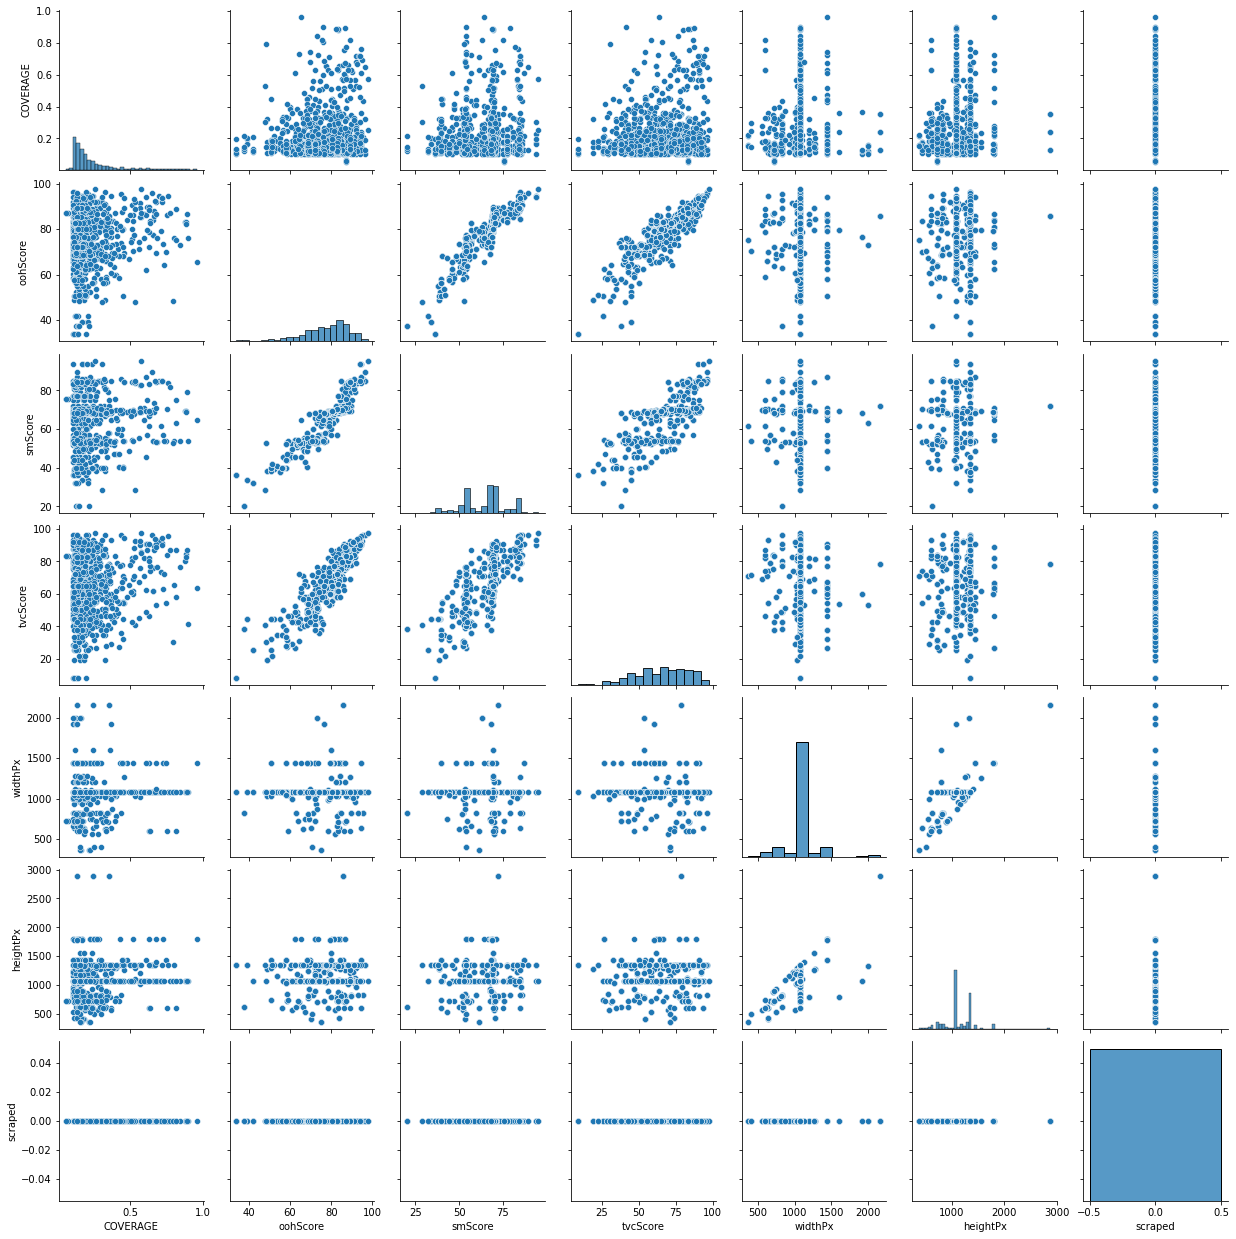

In [13]:
sns.pairplot(df)

In [14]:
#lets change the dtype for remaining features

df.ASSETID=df.ASSETID.astype('category')
df.ASSETTYPEID=df.ASSETTYPEID.astype('category')
df.Asset_Type_Name=df.Asset_Type_Name.astype('category')
df.ID=df.ID.astype('category')
df.publishedAt=pd.to_datetime(df.publishedAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.CREATEDAT_COLOR=pd.to_datetime(df.CREATEDAT_COLOR,format='%Y-%m-%dT%H:%M:%S.%f')
df.createdAt=pd.to_datetime(df.createdAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.updatedAt=pd.to_datetime(df.updatedAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.COLOR=df.COLOR.astype('category')
df.Filename=df.Filename.astype('category')
df.campaignId=df.campaignId.astype('category')
df.sectorId=df.sectorId.astype('category')
df.fileType=df.fileType.astype('category')
df.mimeType=df.mimeType.astype('category')
df.brandId=df.brandId.astype('category')
df.parentAssetTypeId=df.parentAssetTypeId.astype('category')



To have a better understanding about the DateTime Columns let's create some Time Trend Graphs and check how the Metrics Columns Behave over time

<AxesSubplot:xlabel='publishedAt'>

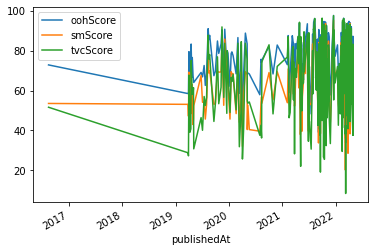

In [15]:
df[['publishedAt','oohScore','smScore','tvcScore']].sort_values(by=['publishedAt']).set_index('publishedAt').plot(y=['oohScore','smScore','tvcScore'])

<AxesSubplot:xlabel='publishedAt'>

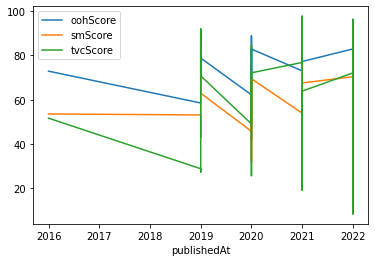

In [16]:
temp=df[['publishedAt','oohScore','smScore','tvcScore']].sort_values(by=['publishedAt'])


temp['publishedAt']=temp['publishedAt'].dt.year
temp[['publishedAt','oohScore','smScore','tvcScore']].set_index('publishedAt').plot(y=['oohScore','smScore','tvcScore'])

In [18]:
temp=df[['publishedAt','oohScore','smScore','tvcScore']].sort_values(by=['publishedAt']).set_index('publishedAt')


In [321]:
def adfull_test(L):
	
	for i in range(L.shape[1]):
		print ("\n Augmented Dickey-Fuller test for {} \n".format(L.columns[i]))
		X = L.iloc[:,i]
		result = adfuller(X)
		print('ADF Statistic: %f' % result[0])
		print('p-value: %.15f' % result[1])
		print('Critical Values:')
		for key, value in result[4].items():
			if result[0]< value:
				print('\t{}: {} \t Reject the null Hypothesi on {} confidence level'.format(key,value,100-int(key[:-1])))
			else:
				print('\t{}: {} \t Fail to Reject the null Hypothesis on {} confidence level'.format(key,value,100-int(key[:-1])))
		
adfull_test(temp[['oohScore','smScore','tvcScore']])
		


 Augmented Dickey-Fuller test for oohScore 

ADF Statistic: -9.564884
p-value: 0.000000000000000
Critical Values:
	1%: -3.4378800537375045 	 Reject the null Hypothesi on 99 confidence level
	5%: -2.864864011317803 	 Reject the null Hypothesi on 95 confidence level
	10%: -2.5685399483682003 	 Reject the null Hypothesi on 90 confidence level

 Augmented Dickey-Fuller test for smScore 

ADF Statistic: -9.631482
p-value: 0.000000000000000
Critical Values:
	1%: -3.4378800537375045 	 Reject the null Hypothesi on 99 confidence level
	5%: -2.864864011317803 	 Reject the null Hypothesi on 95 confidence level
	10%: -2.5685399483682003 	 Reject the null Hypothesi on 90 confidence level

 Augmented Dickey-Fuller test for tvcScore 

ADF Statistic: -9.823393
p-value: 0.000000000000000
Critical Values:
	1%: -3.4378800537375045 	 Reject the null Hypothesi on 99 confidence level
	5%: -2.864864011317803 	 Reject the null Hypothesi on 95 confidence level
	10%: -2.5685399483682003 	 Reject the null Hypot

**CONLUSION:**
- *After testing the 3 Metrics of Score for stationarity, we can feel secure about the regression process.*

- The next graph were made just to have a better understading about additional Datetime Columns. After checking them on more detail, one can conclude that those dates are more related about creation date/time from each record on its respective table(Asset_type,Asset_color). Therefore, these columns must be removed from Feature set for Regression Analysis.


<AxesSubplot:xlabel='createdAt'>

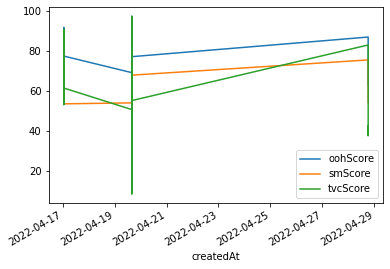

In [272]:
df[['createdAt','oohScore','smScore','tvcScore']].sort_values(by=['createdAt']).set_index('createdAt').plot(y=['oohScore','smScore','tvcScore'])

<AxesSubplot:xlabel='CREATEDAT_COLOR'>

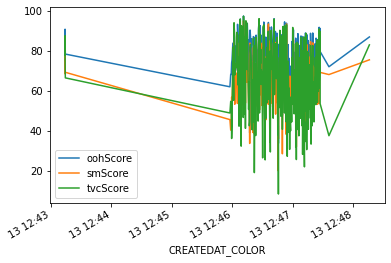

In [271]:
df[['CREATEDAT_COLOR','oohScore','smScore','tvcScore']].sort_values(by=['CREATEDAT_COLOR']).set_index('CREATEDAT_COLOR').plot(y=['oohScore','smScore','tvcScore'])

<AxesSubplot:xlabel='updatedAt'>

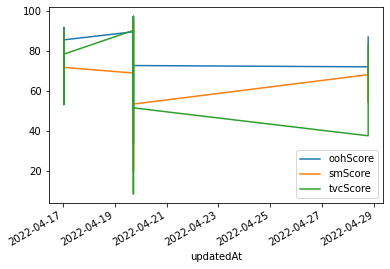

In [274]:
df[['updatedAt','oohScore','smScore','tvcScore']].sort_values(by=['updatedAt']).set_index('updatedAt').plot(y=['oohScore','smScore','tvcScore'])

In [ ]:
data=df[['Asset_Type_Name', 'COLOR', 'COVERAGE', 'fileType', 'brandId','widthPx', 'heightPx', 'publishedAt','oohScore','smScore','tvcScore']]
data['year']=data.publishedAt.dt.year.astype('category')
data['month']=data.publishedAt.dt.month.astype('category')
data['weightedCover']=np.array(data['COVERAGE'] )* np.array(data['widthPx']) * np.array(data['heightPx'])

In [358]:
data.dtypes

Asset_Type_Name          category
COLOR                    category
COVERAGE                  float64
fileType                 category
brandId                  category
widthPx                     int64
heightPx                    int64
publishedAt        datetime64[ns]
oohScore                  float64
smScore                   float64
tvcScore                  float64
year                     category
month                    category
weightedCover             float64
dtype: object

In [359]:
formula1 = 'smScore ~weightedCover+C(COLOR)+C(brandId)+C(year)+C(month)+C(fileType)'

model1 = sm.ols(formula = formula1, data = data)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                smScore   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2.971
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           6.41e-10
Time:                        16:54:49   Log-Likelihood:                -3442.6
No. Observations:                 876   AIC:                             6979.
Df Residuals:                     829   BIC:                             7204.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

The first try if regression Fit shows a problem with multicollinearity, let's try to find out if this is a trouble or not(due to low R2 we can consider not a problem)

In [360]:
formula1 = 'smScore ~C(COLOR)+C(brandId)+C(year)+C(month)+C(fileType)'

model1 = sm.ols(formula = formula1, data = data)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                smScore   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2.937
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.44e-09
Time:                        16:54:52   Log-Likelihood:                -3444.7
No. Observations:                 876   AIC:                             6981.
Df Residuals:                     830   BIC:                             7201.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

We found out that by taking out from the formula the feature "weightedCover" the multicollinearity error is no more shown, however the R2 is not improved significantly

Therefore let's try to explain the variable "weightedCover" with other independet variables

In [361]:
formula1 = 'weightedCover ~C(COLOR)+C(brandId)+C(year)+C(month)+C(fileType)'

model1 = sm.ols(formula = formula1, data = data)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:          weightedCover   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3.745
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.26e-14
Time:                        16:54:56   Log-Likelihood:                -12088.
No. Observations:                 876   AIC:                         2.427e+04
Df Residuals:                     830   BIC:                         2.449e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

As we can see above the independent variables can not explain the suspicious variable, therefore the multicollinearity is not an issue.

As an additional scope, Let's create a correlation matrix with all categorical variables 


In [362]:
#to build a correlation matrix for categorical features we need first to get dummies
data_4_corr=data.copy()
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['COLOR'], drop_first=True, prefix='COLOR', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['Asset_Type_Name'], drop_first=True, prefix='Asset_Type_Name', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['fileType'], drop_first=True, prefix='fileType', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['brandId'], drop_first=True, prefix='brandId', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['year'], drop_first=True, prefix='year', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['month'], drop_first=True, prefix='month', prefix_sep='')

In [363]:
data_4_corr = data_4_corr.drop(['widthPx', 'heightPx','COVERAGE'],axis=1)
data_4_corr

,publishedAt,oohScore,smScore,tvcScore,weightedCover,COLORBeige,COLORBlack,COLORBlue,COLORBordeaux/ Fire Brick,COLORGolden Rod,...,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,2022-04-17 01:04:36.976424,83.7600,71.9500,68.0782,161400.000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2022-04-17 01:04:36.976424,83.7600,71.9500,68.0782,306450.240,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2022-04-17 01:04:36.976424,83.7600,71.9500,68.0782,99749.760,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2022-04-17 01:04:36.976424,83.7600,71.9500,68.0782,120450.240,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2022-04-17 01:04:37.095722,82.2400,71.9500,76.9291,124949.760,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2022-04-28 00:00:00.000000,72.2284,68.3047,37.6405,111754.080,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
872,2022-04-28 00:00:00.000000,72.2284,68.3047,37.6405,212863.464,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
873,2022-04-28 00:00:00.000000,72.2284,68.3047,37.6405,70999.416,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
874,2022-04-28 00:00:00.000000,72.2284,68.3047,37.6405,107795.448,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [314]:
data_4_corr.corr()

,oohScore,smScore,tvcScore,weightedCover,COLORBeige,COLORBlack,COLORBlue,COLORBordeaux/ Fire Brick,COLORGolden Rod,COLORGray,...,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
oohScore,1.000000,0.921892,0.882717,0.088606,0.050742,-0.072188,0.030182,0.046567,0.019696,0.006123,...,-0.040875,0.027892,-0.099072,0.015135,-0.095876,0.071582,-0.065591,0.040583,0.008554,0.070765
smScore,0.921892,1.000000,0.786527,0.074402,0.043648,-0.075079,0.042251,0.007817,0.032957,0.005922,...,-0.014655,0.006221,-0.139195,0.036265,-0.100452,0.033028,-0.053056,0.053736,0.009337,0.104720
tvcScore,0.882717,0.786527,1.000000,0.100882,0.067037,-0.073992,0.034830,0.056223,0.003976,-0.006938,...,-0.011801,0.006299,-0.044503,0.002713,-0.143956,0.039004,-0.052978,0.034633,-0.002170,0.069404
weightedCover,0.088606,0.074402,0.100882,1.000000,-0.070898,-0.008794,-0.017235,0.118985,-0.079741,-0.037544,...,-0.084012,0.045202,0.069302,0.085779,0.040005,0.043955,-0.059380,-0.066846,0.025598,0.027313
COLORBeige,0.050742,0.043648,0.067037,-0.070898,1.000000,-0.040389,-0.004462,-0.027325,-0.040389,-0.048445,...,-0.018916,0.021125,0.007623,-0.021185,-0.026523,-0.028107,0.014022,0.023669,-0.026927,0.035051
COLORBlack,-0.072188,-0.075079,-0.073992,-0.008794,-0.040389,1.000000,-0.010345,-0.063347,-0.093633,-0.112311,...,0.008200,0.025721,-0.036647,-0.023038,-0.040366,-0.025104,0.021406,-0.004252,-0.041592,-0.023038
COLORBlue,0.030182,0.042251,0.034830,-0.017235,-0.004462,-0.010345,1.000000,-0.006999,-0.010345,-0.012408,...,-0.016346,-0.013856,-0.008049,-0.005426,-0.006793,-0.007199,0.077184,-0.013534,-0.006897,-0.005426
COLORBordeaux/ Fire Brick,0.046567,0.007817,0.056223,0.118985,-0.027325,-0.063347,-0.006999,1.000000,-0.063347,-0.075984,...,-0.056080,-0.052079,0.078309,0.077027,0.017945,0.097062,-0.012433,-0.049543,-0.012871,0.040275
COLORGolden Rod,0.019696,0.032957,0.003976,-0.079741,-0.040389,-0.093633,-0.010345,-0.063347,1.000000,-0.112311,...,0.060253,0.014095,-0.000434,0.003036,-0.040366,-0.025104,-0.045207,-0.027901,0.000071,0.055185
COLORGray,0.006123,0.005922,-0.006938,-0.037544,-0.048445,-0.112311,-0.012408,-0.075984,-0.112311,1.000000,...,-0.006374,-0.019700,-0.024745,-0.036355,-0.018939,0.025789,0.060120,0.057635,-0.056857,-0.058910


<AxesSubplot:>

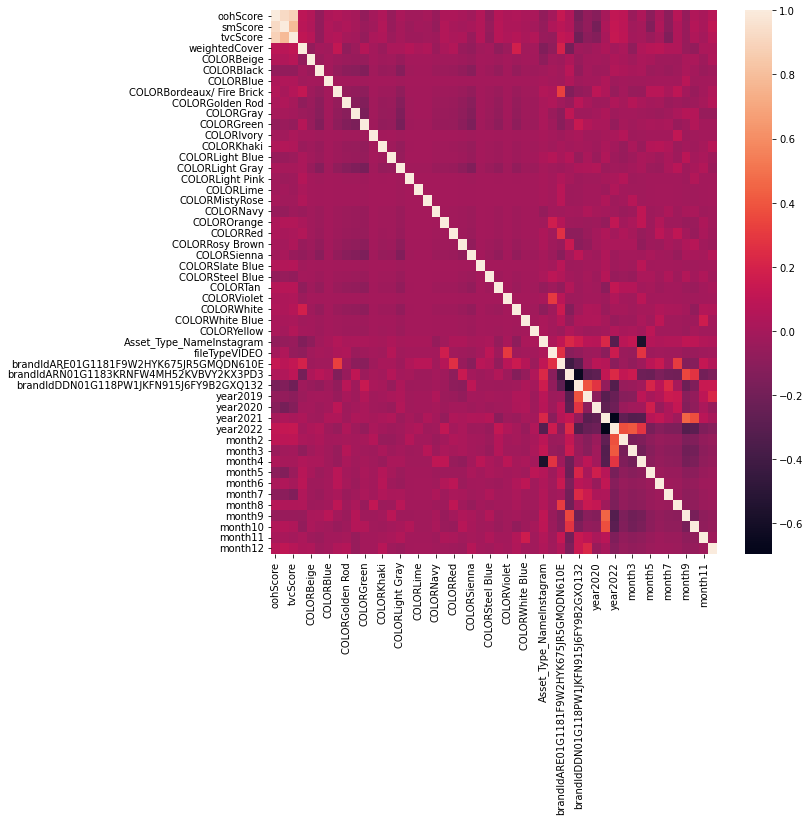

In [364]:
plt.figure(figsize=(10,10))
sns.heatmap(data_4_corr.corr())

As we can see in the heat map graph there are no correlation between variables, besides correlation between each Score Metrics

Lets try to use Multi Linear Regression Model to Explain the behaivor of one Score metric

1) Split data in train and test 

In [365]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['smScore','tvcScore','oohScore'],axis=1), data.smScore,test_size=0.3)

In [366]:
data_train=pd.concat([X_train,y_train],axis=1)
data_train

,Asset_Type_Name,COLOR,COVERAGE,fileType,brandId,widthPx,heightPx,publishedAt,year,month,weightedCover,smScore
440,Instagram,Light Gray,0.199531,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,828,828,2022-04-03 10:01:59,2022,4,1.367953e+05,59.7750
703,Instagram,Green,0.887344,IMAGE,DDN01G118PW1JKFN915J6FY9B2GXQ132,1080,1080,2020-10-01 10:00:28,2020,10,1.034998e+06,69.0500
318,Instagram,Rosy Brown,0.139531,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1080,1350,2022-02-25 13:04:10,2022,2,2.034362e+05,69.1250
158,Instagram,Light Gray,0.212656,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1080,1350,2021-09-27 13:58:22,2021,9,3.100524e+05,84.7125
177,Instagram,Sienna,0.175469,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1034,1293,2021-10-03 17:29:58,2021,10,2.345954e+05,84.2000
...,...,...,...,...,...,...,...,...,...,...,...,...
839,Instagram,Green,0.225625,IMAGE,DDN01G118PW1JKFN915J6FY9B2GXQ132,1079,1079,2022-01-24 11:47:20,2022,1,2.626819e+05,49.7375
230,Instagram,Gray,0.136250,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1080,1350,2021-10-14 11:57:01,2021,10,1.986525e+05,77.0625
762,Instagram,Green,0.154375,IMAGE,DDN01G118PW1JKFN915J6FY9B2GXQ132,1270,1256,2021-05-30 20:28:15,2021,5,2.462466e+05,84.5625
363,Instagram,Light Gray,0.107188,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1080,1350,2022-03-09 11:32:34,2022,3,1.562801e+05,36.0375


In [367]:

formula1 = 'smScore ~ weightedCover*(C(COLOR)+C(year)+C(month)+C(brandId)+C(fileType))+weightedCover'

model1 = sm.ols(formula = formula1, data = data_train)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                smScore   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.629
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           0.000898
Time:                        16:55:12   Log-Likelihood:                -2386.4
No. Observations:                 613   AIC:                             4939.
Df Residuals:                     530   BIC:                             5305.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Let's check the Regression Metrics

In [368]:
predicted=fitted1.predict(X_test)
Error_m=pd.DataFrame(columns=['MedAE','MAE','MSE','R2S'])
Error_m.loc['model1','MedAE']=skm.median_absolute_error(y_test, predicted)
Error_m.loc['model1','MAE']=skm.mean_absolute_error(y_test, predicted)
Error_m.loc['model1','MSE']=np.sqrt(skm.mean_squared_error(y_test, predicted))
Error_m.loc['model1','R2S']=skm.r2_score(y_test, predicted)
Error_m

,MedAE,MAE,MSE,R2S
model1,8.906454,11.203411,15.508314,-0.358515


<AxesSubplot:ylabel='Count'>

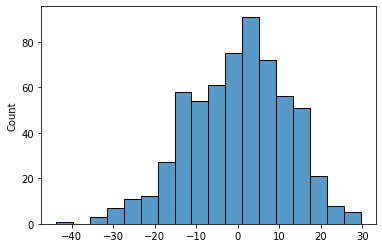

In [369]:
sns.histplot(fitted1.resid)

In [370]:
from scipy import stats
mu, std = stats.norm.fit(fitted1.resid)
mu, std

(-2.8599712092859763e-09, 11.86993826309667)

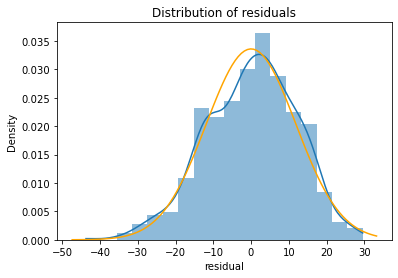

In [371]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=fitted1.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

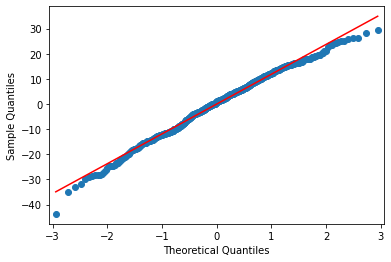

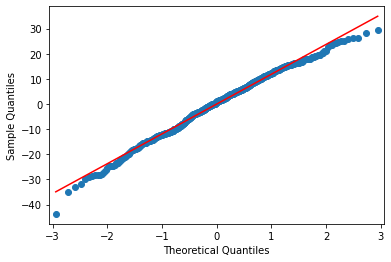

In [372]:
sm_.qqplot(fitted1.resid, line='s')


c:\Users\corre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


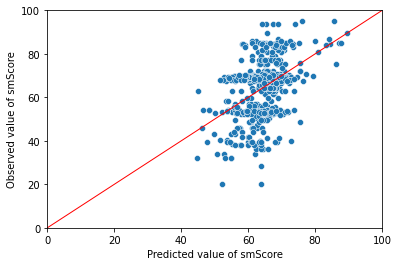

In [373]:
Y_max = 100
Y_min = 0

ax = sns.scatterplot(fitted1.fittedvalues, y_train)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of smScore")
ax.set_ylabel("Observed value of smScore")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

We got good results for Median Absolute Error, Mean Absolute Error, squarred Absolute Error and other metrics, However the variance of the Dependat variable was not well represented by the Predicted Values.

Therefore, Let's try another formula for Regression Model and check how the R2 and other metrics behave

First, let's reduce the number of categories for COLOR feature

In [374]:
data.COLOR.value_counts()

Green                   142
Light Gray              122
Gray                    104
Sienna                   96
Black                    75
Golden Rod               75
Rosy Brown               40
Bordeaux/ Fire Brick     36
Tan                      33
White                    33
Khaki                    22
Light Blue               16
Red                      15
Beige                    15
Orange                   11
Navy                     11
Steel Blue                9
Yellow                    7
White Blue                4
Light Pink                2
Ivory                     2
Violet                    1
Aquamarine                1
Slate Blue                1
MistyRose                 1
Blue                      1
Lime                      1
Name: COLOR, dtype: int64

Let's use the Pareto Principle to reduce the number of categories on COLOR

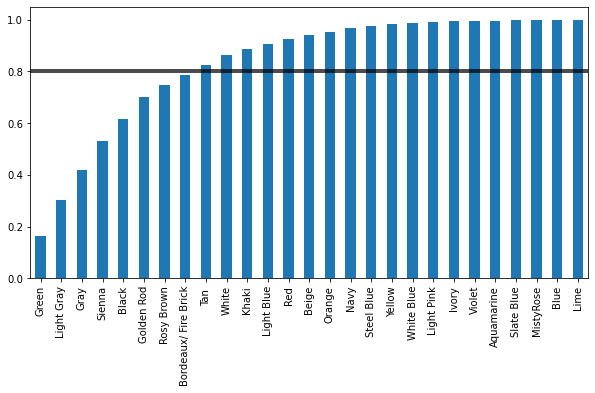

In [375]:
data.COLOR.value_counts().cumsum().apply(lambda x: x/data.COLOR.count()).plot(kind='bar', figsize=(10,5))
plt.axhline(0.8, ls='-', color='black', lw=4, alpha=0.7)



In [376]:
Top80Color = data.COLOR.value_counts().loc[data.COLOR.value_counts().cumsum().apply(lambda x: x / data.COLOR.count()) <= 0.8].index.tolist()
data.COLOR = data.COLOR.apply(lambda x: x if (x in Top80Color) else('others'))
data.COLOR.value_counts()

C:\Users\corre\AppData\Local\Temp\ipykernel_25260\862422098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.COLOR = data.COLOR.apply(lambda x: x if (x in Top80Color) else('others'))


others                  186
Green                   142
Light Gray              122
Gray                    104
Sienna                   96
Golden Rod               75
Black                    75
Rosy Brown               40
Bordeaux/ Fire Brick     36
Name: COLOR, dtype: int64

To check correlation between categorical variables, it is required to have Dummies format

In [377]:
data_4_corr=data.copy()
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['COLOR'], drop_first=True, prefix='COLOR', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['Asset_Type_Name'], drop_first=True, prefix='Asset_Type_Name', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['fileType'], drop_first=True, prefix='fileType', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['brandId'], drop_first=True, prefix='brandId', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['year'], drop_first=True, prefix='year', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['month'], drop_first=True, prefix='month', prefix_sep='')

<AxesSubplot:>

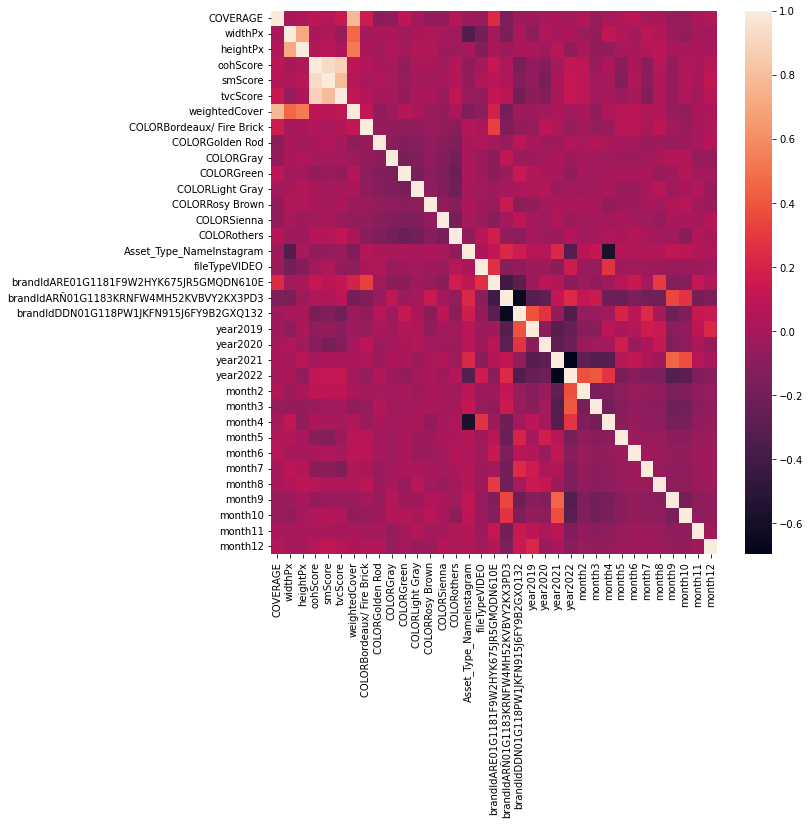

In [378]:
plt.figure(figsize=(10,10))
sns.heatmap(data_4_corr.corr())

In [393]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['smScore','tvcScore','oohScore'],axis=1), data.smScore,test_size=0.3)
data_train=pd.concat([X_train,y_train],axis=1)
data_train

,Asset_Type_Name,COLOR,COVERAGE,fileType,brandId,widthPx,heightPx,publishedAt,year,month,weightedCover,smScore
216,Instagram,Light Gray,0.226406,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1080,1080,2021-10-12 18:13:46,2021,10,2.640800e+05,84.3875
229,Instagram,Light Gray,0.211875,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1080,1350,2021-10-14 11:57:01,2021,10,3.089138e+05,77.0625
364,Instagram,Golden Rod,0.194688,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1080,1350,2022-03-09 11:32:34,2022,3,2.838551e+05,36.0375
582,Instagram,others,0.717969,IMAGE,ARE01G1181F9W2HYK675JR5GMQDN610E,1080,1349,2022-03-01 16:15:10,2022,3,1.046023e+06,84.9250
542,Instagram,Bordeaux/ Fire Brick,0.173906,IMAGE,ARE01G1181F9W2HYK675JR5GMQDN610E,1080,1080,2021-09-08 15:13:43,2021,9,2.028440e+05,69.3000
...,...,...,...,...,...,...,...,...,...,...,...,...
594,Instagram,Sienna,0.417656,IMAGE,DDN01G118PW1JKFN915J6FY9B2GXQ132,1080,720,2019-03-30 11:30:03,2019,3,3.247693e+05,47.1625
705,Instagram,Rosy Brown,0.183906,IMAGE,DDN01G118PW1JKFN915J6FY9B2GXQ132,1440,1440,2020-07-30 15:42:08,2020,7,3.813475e+05,39.6375
89,Instagram,others,0.114531,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1080,1332,2021-09-11 11:32:13,2021,9,1.647597e+05,68.1750
178,Instagram,Green,0.152812,IMAGE,ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,1034,1293,2021-10-03 17:29:58,2021,10,2.043038e+05,84.2000


In [394]:
formula2 = 'np.log(smScore) ~ np.log(weightedCover)+year+month+C(COLOR)+C(brandId)+C(fileType)' 

model2 = sm.ols(formula = formula2, data = data_test)
fitted2 = model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(smScore)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.332
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           0.000153
Time:                        17:07:14   Log-Likelihood:                 73.987
No. Observations:                 613   AIC:                            -89.97
Df Residuals:                     584   BIC:                             38.16
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

c:\Users\corre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


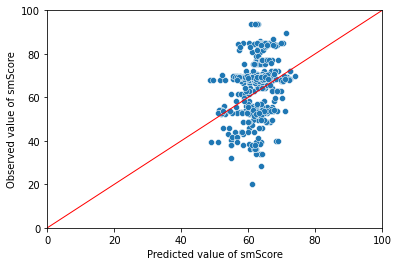

In [395]:
Y_max = 100
Y_min = 0

ax = sns.scatterplot(np.exp(fitted2.fittedvalues), y_train)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of smScore")
ax.set_ylabel("Observed value of smScore")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [396]:
predicted2=fitted2.predict(X_test)

Error_m.loc['model2','MedAE']=skm.median_absolute_error(y_test, np.exp(predicted2))
Error_m.loc['model2','MAE']=skm.mean_absolute_error(y_test, np.exp(predicted2))
Error_m.loc['model2','MSE']=np.sqrt(skm.mean_squared_error(y_test, np.exp(predicted2)))
Error_m.loc['model2','R2S']=skm.r2_score(y_test, np.exp(predicted2))
Error_m

,MedAE,MAE,MSE,R2S
model1,8.906454,11.203411,15.508314,-0.358515
model2,9.202757,10.360238,12.613939,0.151068


<AxesSubplot:ylabel='Count'>

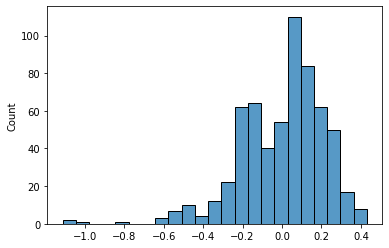

In [397]:
sns.histplot(fitted2.resid)

As we can see this histogram for residuals kinda follow a normal distribution

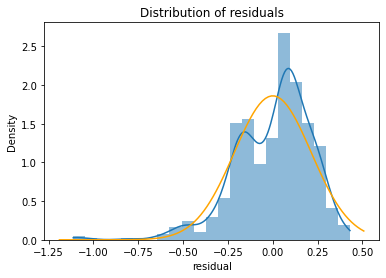

In [398]:
mu, std = stats.norm.fit(fitted2.resid)
mu, std
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=fitted2.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()


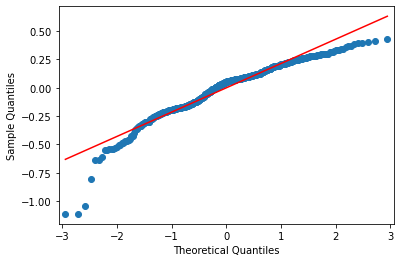

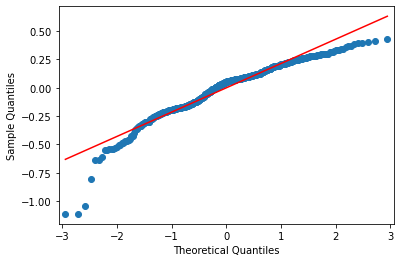

In [399]:
sm_.qqplot(fitted2.resid, line='s')


In terms of R2, the MODEL2 did not improve. However we got good values for Residuals metrics


## Regression Refinement Process

Let's Use TensorFlow Regression to try to get a better Model.(see the TensorFlow Notebook)

# First we analized the influence of color, brand, platform and filetype on the Score Metrics. However as the Platform name was reduced from 15 to 2, that category may have added more value if we got more related data.
# Let's check how the data is distributed if we group by Platform Name without integrating Color Data.

In [36]:
Query="""SELECT AT.NAME,A.sectorId,A.fileType,A.brandId, A.oohScore, A.smScore,
A.tvcScore, A.widthPx, A.heightPx, A.publishedAt  FROM ASSET_TYPE AT
INNER JOIN ASSET A ON A.PARENTASSETTYPEID=AT.PARENTID"""
data2=pd.read_sql(Query,con=conn)
data2

,name,sectorId,fileType,brandId,oohScore,smScore,tvcScore,widthPx,heightPx,publishedAt
0,TikTok,00P01FYCYRJWF3ZS34NY3VD07CW70AQA,IMAGE,NWP01G4BDRSWT6HQPPCBCCH3B08T35AS,88.0100,70.8625,80.9709,469,350,2022-06-06 18:33:23.970851
1,TikTok,1DA01FYCYRJWBHKEA9E4CXJ04RQ15INE,IMAGE,03O01FYEP5T45YHZC1NQ38WAT5E4YR3A,64.3300,54.0000,52.5055,320,320,2022-05-04 08:59:18.493648
2,TikTok,1DA01FYCYRJWBHKEA9E4CXJ04RQ15INE,IMAGE,03O01FYEP5T45YHZC1NQ38WAT5E4YR3A,66.0800,52.8125,59.9218,632,632,2022-05-04 08:59:18.506317
3,TikTok,1DA01FYCYRJWBHKEA9E4CXJ04RQ15INE,IMAGE,03O01FYEP5T45YHZC1NQ38WAT5E4YR3A,67.2600,52.3750,54.8618,1080,1080,2022-05-03 14:12:05.268299
4,TikTok,1DA01FYCYRJWBHKEA9E4CXJ04RQ15INE,IMAGE,03O01FYEP5T45YHZC1NQ38WAT5E4YR3A,67.6900,52.8375,55.3400,1080,1078,2022-05-03 14:15:19.495048
...,...,...,...,...,...,...,...,...,...,...
6350,Key visual,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,5WK01FWK92P0F8AW1RS85RF8YNW6GSSP,89.2400,80.7250,82.0145,1080,1080,2022-06-07 00:00:00
6351,Key visual,RF101FYCYRJWDDH1EPAZNXSH18MY30EA,IMAGE,5WK01FWK92P0F8AW1RS85RF8YNW6GSSP,89.2900,82.6875,92.8182,1080,1080,2022-06-07 00:00:00
6352,Key visual,WNF01FYCYRJWJE7HFA9N3AZ6PZ85AWW5,IMAGE,0KN01G118REKBHTBWCNH2V64E7223R0D,51.7300,52.8125,44.6364,2560,1440,2022-05-26 16:52:55.658509
6353,Key visual,WNF01FYCYRJWJE7HFA9N3AZ6PZ85AWW5,IMAGE,NWP01G4BDRSWT6HQPPCBCCH3B08T35AS,68.2600,52.9500,44.6364,690,690,2022-05-31 19:37:04.469686


In [42]:
data2.groupby('name')['smScore','tvcScore','oohScore'].sum().sort_values(by=['smScore','tvcScore','oohScore'],ascending=False)

C:\Users\corre\AppData\Local\Temp\ipykernel_3236\1006268783.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2.groupby('name')['smScore','tvcScore','oohScore'].sum().sort_values(by=['smScore','tvcScore','oohScore'],ascending=False)


,smScore,tvcScore,oohScore
name,,,
Facebook,51382.7907,53248.26037,61351.9440
Google display banners,51382.7907,53248.26037,61351.9440
Instagram,51382.7907,53248.26037,61351.9440
Key visual,51382.7907,53248.26037,61351.9440
Out of Home,51382.7907,53248.26037,61351.9440
TV,51382.7907,53248.26037,61351.9440
TikTok,51382.7907,53248.26037,61351.9440
YouTube,51382.7907,53248.26037,61351.9440
Shelf frame,342.1823,338.66760,384.8822


This information is not conclusive and do not allow us to develop a better model

# NOTE: 

Later I can develop a Decision Tree Model or Random Forest Model TO DEVELOP NEW INSIGHTS ABOUT AD CAMPAIGNS AND UPDATE THE REPO WITH NEW RESULTS!
